In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("wafer.csv")
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [13]:
#Dropping Unnamed columns as its not necessary
df.drop(['Unnamed: 0'], axis =1 , inplace = True)

In [14]:
df.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,-0.0046,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [15]:
# Find if there is any duplicate values
df.duplicated().sum()
# No duplicate values

0

In [16]:
df.shape

(100, 591)

In [17]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 591 entries, Sensor-1 to Good/Bad
dtypes: float64(494), int64(97)
memory usage: 461.8 KB


In [19]:
# Dropping the columns where null values are greater then 30% as even though we fill them it will create noise

In [20]:
cols = []
for col in df.columns:
    if (df[col].isnull().sum()) > 30:
        df.drop([col], axis = 1 , inplace = True)
        cols.append(col)

In [21]:
# Filling the null values with Median as outlier is not treated
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

In [22]:
df.isnull().sum()

Sensor-1      0
Sensor-2      0
Sensor-3      0
Sensor-4      0
Sensor-5      0
Sensor-6      0
Sensor-7      0
Sensor-8      0
Sensor-9      0
Sensor-10     0
Sensor-11     0
Sensor-12     0
Sensor-13     0
Sensor-14     0
Sensor-15     0
Sensor-16     0
Sensor-17     0
Sensor-18     0
Sensor-19     0
Sensor-20     0
Sensor-21     0
Sensor-22     0
Sensor-23     0
Sensor-24     0
Sensor-25     0
Sensor-26     0
Sensor-27     0
Sensor-28     0
Sensor-29     0
Sensor-30     0
Sensor-31     0
Sensor-32     0
Sensor-33     0
Sensor-34     0
Sensor-35     0
Sensor-36     0
Sensor-37     0
Sensor-38     0
Sensor-39     0
Sensor-40     0
Sensor-41     0
Sensor-42     0
Sensor-43     0
Sensor-44     0
Sensor-45     0
Sensor-46     0
Sensor-47     0
Sensor-48     0
Sensor-49     0
Sensor-50     0
Sensor-51     0
Sensor-52     0
Sensor-53     0
Sensor-54     0
Sensor-55     0
Sensor-56     0
Sensor-57     0
Sensor-58     0
Sensor-59     0
Sensor-60     0
Sensor-61     0
Sensor-62     0
Sensor-6

In [23]:
df.head(10)

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-578,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,...,17.6552,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,...,11.8075,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,...,17.6552,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,...,17.6552,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,-0.0046,...,15.1082,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1
5,3003.72,2537.66,2210.7778,2008.9216,1.1351,100.0,91.1078,0.1240,1.3940,-0.0073,...,10.5084,0.5033,0.0154,0.0043,3.0647,0.0099,0.0113,0.0038,114.2878,-1
6,2953.59,2504.86,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4517,0.0069,...,15.1082,0.4963,0.0156,0.0038,3.1427,0.0099,0.0113,0.0038,114.2878,-1
7,3086.52,2360.04,2204.2333,2110.8288,1.6392,100.0,89.0356,0.1245,1.4798,0.0046,...,11.5777,0.4925,0.0145,0.0038,2.9486,0.0099,0.0113,0.0038,114.2878,-1
8,3048.76,2545.68,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4563,0.0075,...,10.5084,0.5032,0.0129,0.0034,2.5678,0.0099,0.0113,0.0038,114.2878,-1
9,2984.06,2619.60,2225.0222,1730.8480,1.5333,100.0,98.5978,0.1232,1.4696,0.0081,...,17.6552,0.4978,0.0133,0.0032,2.6765,0.0128,0.0193,0.0060,151.1930,-1


In [24]:
# Class is Imbalanced
df['Good/Bad'].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

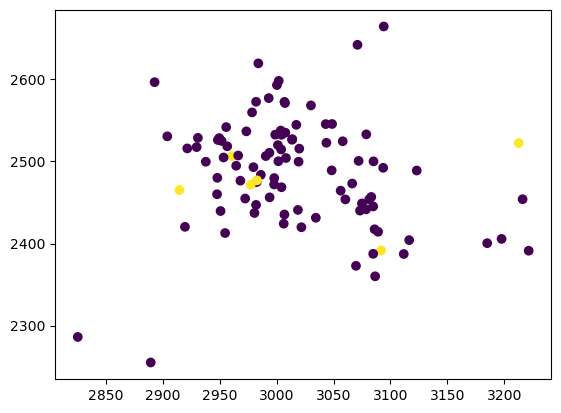

In [25]:
plt.scatter(df['Sensor-1'], df['Sensor-2'], c = df['Good/Bad'])

In [26]:
# Using SMOTE technique has class is imblance

In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [28]:
list(df.columns)[:-1]

['Sensor-1',
 'Sensor-2',
 'Sensor-3',
 'Sensor-4',
 'Sensor-5',
 'Sensor-6',
 'Sensor-7',
 'Sensor-8',
 'Sensor-9',
 'Sensor-10',
 'Sensor-11',
 'Sensor-12',
 'Sensor-13',
 'Sensor-14',
 'Sensor-15',
 'Sensor-16',
 'Sensor-17',
 'Sensor-18',
 'Sensor-19',
 'Sensor-20',
 'Sensor-21',
 'Sensor-22',
 'Sensor-23',
 'Sensor-24',
 'Sensor-25',
 'Sensor-26',
 'Sensor-27',
 'Sensor-28',
 'Sensor-29',
 'Sensor-30',
 'Sensor-31',
 'Sensor-32',
 'Sensor-33',
 'Sensor-34',
 'Sensor-35',
 'Sensor-36',
 'Sensor-37',
 'Sensor-38',
 'Sensor-39',
 'Sensor-40',
 'Sensor-41',
 'Sensor-42',
 'Sensor-43',
 'Sensor-44',
 'Sensor-45',
 'Sensor-46',
 'Sensor-47',
 'Sensor-48',
 'Sensor-49',
 'Sensor-50',
 'Sensor-51',
 'Sensor-52',
 'Sensor-53',
 'Sensor-54',
 'Sensor-55',
 'Sensor-56',
 'Sensor-57',
 'Sensor-58',
 'Sensor-59',
 'Sensor-60',
 'Sensor-61',
 'Sensor-62',
 'Sensor-63',
 'Sensor-64',
 'Sensor-65',
 'Sensor-66',
 'Sensor-67',
 'Sensor-68',
 'Sensor-69',
 'Sensor-70',
 'Sensor-71',
 'Sensor-72',
 

In [29]:
x, y = oversample.fit_resample(df[list(df.columns)[:-1]], df[list(df.columns)[-1]])

In [30]:
x.shape, y.shape

((188, 562), (188,))

In [31]:
df_1 = pd.DataFrame(x, columns = list(df.columns)[:-1])

In [32]:
df_1.shape

(188, 562)

In [33]:
[list(df.columns)[-1]]

['Good/Bad']

In [34]:
df_2 = pd.DataFrame(y, columns = [list(df.columns)[-1]])
df_2.shape

(188, 1)

In [35]:
df_final_smote = pd.concat([df_1,df_2], axis = 1)

In [36]:
df_final_smote['Good/Bad'].value_counts()

Good/Bad
-1    94
 1    94
Name: count, dtype: int64

In [37]:
df_final_smote.columns

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
       ...
       'Sensor-578', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=563)

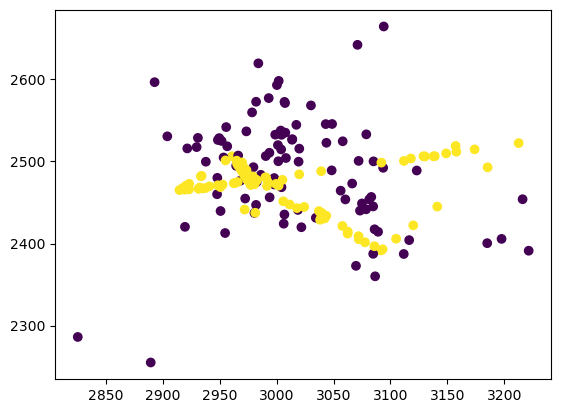

In [38]:
# Final Data_Frame after applying smoothing Technique
plt.scatter(df_final_smote['Sensor-1'], df_final_smote['Sensor-2'], c = df_final_smote['Good/Bad'])

In [55]:
df_final_smote.shape

(188, 563)

In [40]:
df_final_smote['Good/Bad'].value_counts()

Good/Bad
-1    94
 1    94
Name: count, dtype: int64

In [41]:
# df_final_smote['Good/Bad'] = df_final_smote['Good/Bad'].replace(-1,0)

In [42]:
df_final_smote['Good/Bad'].value_counts()

Good/Bad
-1    94
 1    94
Name: count, dtype: int64

In [43]:
# Divide x and y
x = df_final_smote.drop(["Good/Bad"], axis = 1)
y = df_final_smote['Good/Bad']

In [44]:
x.shape, y.shape

((188, 562), (188,))

In [45]:
# Train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)

In [46]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((150, 562), (150,), (38, 562), (38,))

In [47]:
# Model Training
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [48]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          "XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

In [49]:
kf = KFold(n_splits = 3, shuffle=True, random_state=None) 

In [50]:
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, x_train, y_train, cv = kf)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    model_score = accuracy_score(y_test,y_pred)
    print("Scores", scores * 100)
    print(f"Accuracy score of {model} is {model_score * 100}") 
    print("*"*35)
    report.append(model_score*100)
    model_list.append(list(models.keys())[i])
    

print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max(report))]}")

Scores [92. 98. 92.]
Accuracy score of LogisticRegressionCV() is 100.0
***********************************
Scores [66. 76. 68.]
Accuracy score of SVC() is 71.05263157894737
***********************************
Scores [ 94.  94. 100.]
Accuracy score of LinearSVC() is 100.0
***********************************
Scores [100. 100. 100.]
Accuracy score of RandomForestClassifier() is 100.0
***********************************
Scores [96. 98. 98.]
Accuracy score of AdaBoostClassifier() is 100.0
***********************************
Scores [90. 96. 90.]
Accuracy score of GradientBoostingClassifier() is 97.36842105263158
***********************************


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1  1]


In [ ]:
model_list

In [ ]:
report

In [ ]:
# With SMOTE

In [ ]:
df.columns

In [ ]:
x = df.drop(["Good/Bad"],axis =1)
y = df["Good/Bad"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)

In [ ]:
report

In [ ]:
# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x_train.shape

In [ ]:
pca  = PCA()
pca

In [ ]:
x_train = pca.fit_transform(x_train)

In [ ]:
x_train.shape

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:

# Cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance: ", cumulative_variance)

# Number of components to retain 95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to retain 95% variance: ", n_components)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with PCA and a classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('DTC' , DecisionTreeClassifier(random_state=1,))
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(x_test)
accuracy_score(y_pred,y_test)

# EDA done by Sir

In [861]:
df = pd.read_csv("wafer.csv")
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


# 1. Analyze missing Data

# Firstly, we'll check the missing data in the target feature and drop those records. 
# **As if we already know a value of target feature then there's no need for a ML algorithm, damn right?** Therefore, the best way to deal with missing target entries is to delete them. 
# For other missing features, we can definitely use impute strategies.

In [863]:
## Check missing vals in target feature

df["Good/Bad"].isna().sum() 

0

# No missing values for target variable as seen above

# 2. Check missing vals in dependent feature variables

In [865]:
(df.isna().sum().sum() /(df.shape[0] * (df.shape[1] - 1)))*100

3.901861252115059

# Almost 4% out of total cells we're having, are missing.

# We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val.

# 3. Visualizations of sensor distribution

In [867]:
df.columns[1:50]

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10', 'Sensor-11',
       'Sensor-12', 'Sensor-13', 'Sensor-14', 'Sensor-15', 'Sensor-16',
       'Sensor-17', 'Sensor-18', 'Sensor-19', 'Sensor-20', 'Sensor-21',
       'Sensor-22', 'Sensor-23', 'Sensor-24', 'Sensor-25', 'Sensor-26',
       'Sensor-27', 'Sensor-28', 'Sensor-29', 'Sensor-30', 'Sensor-31',
       'Sensor-32', 'Sensor-33', 'Sensor-34', 'Sensor-35', 'Sensor-36',
       'Sensor-37', 'Sensor-38', 'Sensor-39', 'Sensor-40', 'Sensor-41',
       'Sensor-42', 'Sensor-43', 'Sensor-44', 'Sensor-45', 'Sensor-46',
       'Sensor-47', 'Sensor-48', 'Sensor-49'],
      dtype='object')

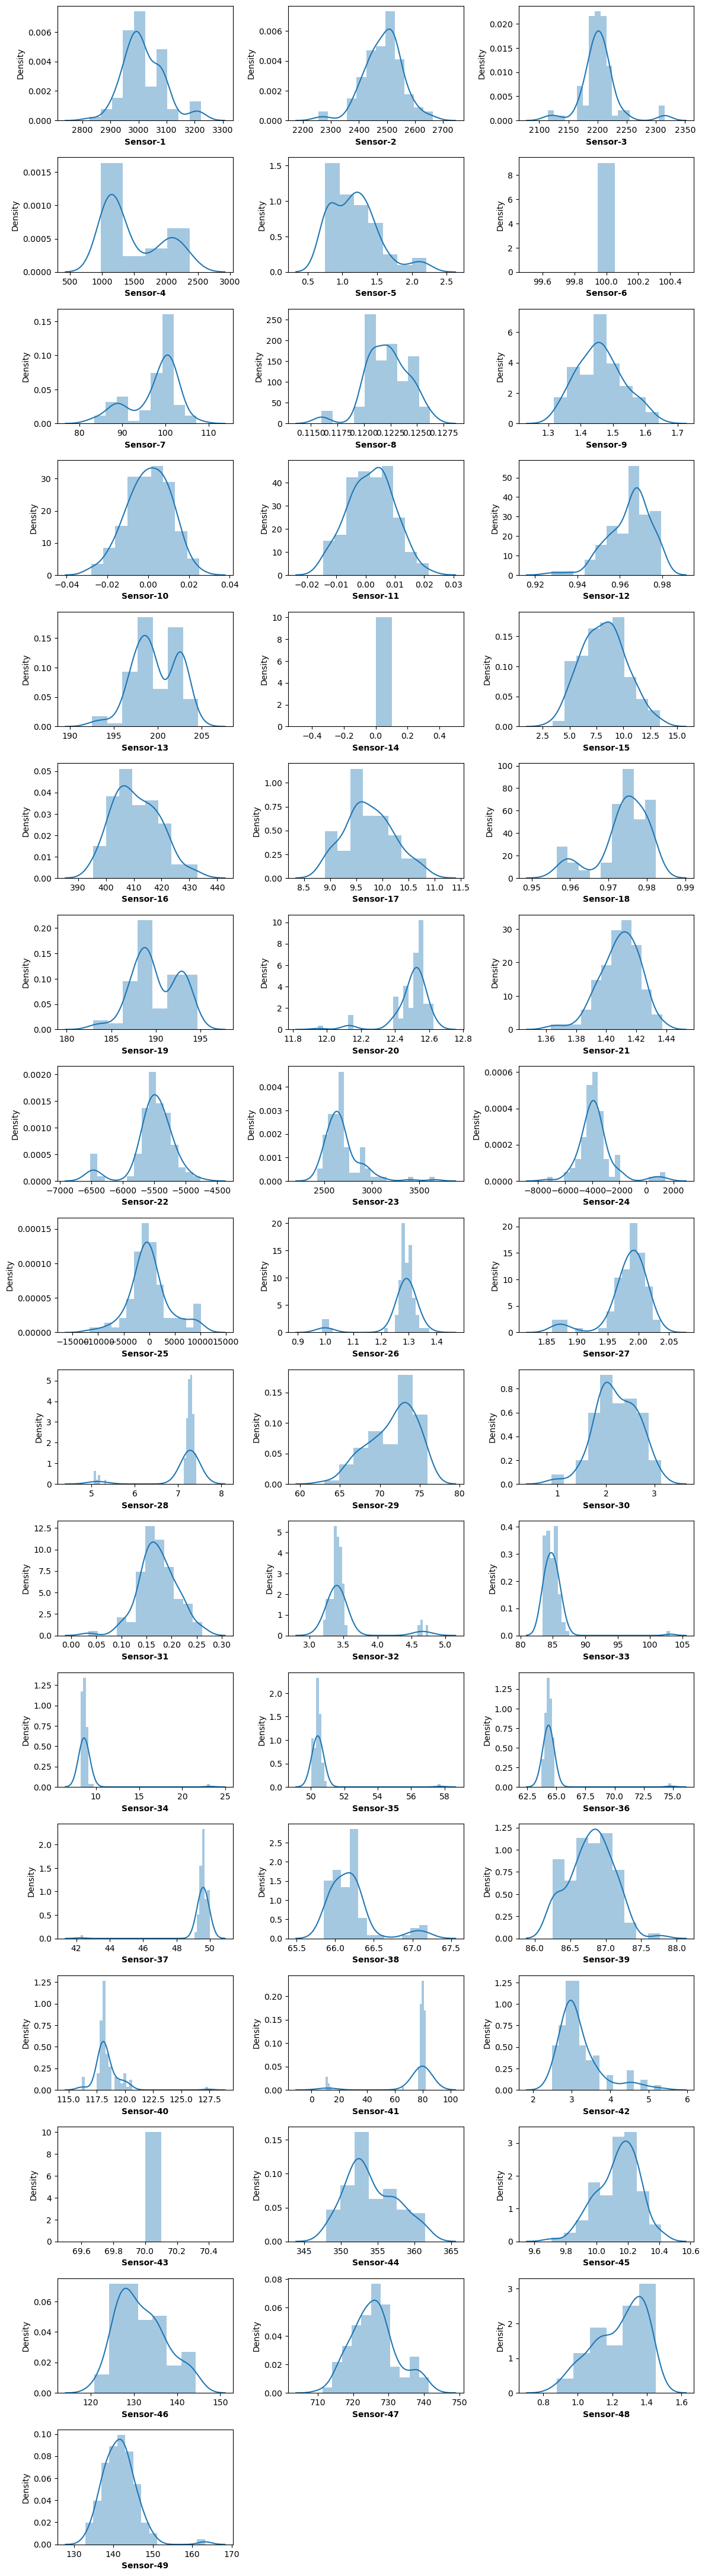

In [122]:
plt.figure(figsize= (12,130))
for i, col in enumerate(list(df.columns[1:50])):
    plt.subplot(51, 3, i+1)
    sns.distplot(df[col], hist = True, kde = True)
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [130]:
# Select 50 random sensors

random_50_sensors_idx = []
for i in range(70):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

In [136]:
df.columns[random_50_sensors_idx]

Index(['Sensor-49', 'Sensor-521', 'Sensor-102', 'Sensor-16', 'Sensor-562',
       'Sensor-533', 'Sensor-313', 'Sensor-194', 'Sensor-6', 'Sensor-480',
       'Sensor-400', 'Sensor-525', 'Sensor-63', 'Sensor-355', 'Sensor-169',
       'Sensor-321', 'Sensor-128', 'Sensor-70', 'Sensor-93', 'Sensor-285',
       'Sensor-429', 'Sensor-350', 'Sensor-197', 'Sensor-179', 'Sensor-156',
       'Sensor-225', 'Sensor-319', 'Sensor-568', 'Sensor-268', 'Sensor-438',
       'Sensor-217', 'Sensor-193', 'Sensor-320', 'Sensor-406', 'Sensor-384',
       'Sensor-293', 'Sensor-418', 'Sensor-51', 'Sensor-492', 'Sensor-562',
       'Sensor-187', 'Sensor-551', 'Sensor-141', 'Sensor-275', 'Sensor-173',
       'Sensor-178', 'Sensor-520', 'Sensor-20', 'Sensor-223', 'Sensor-116',
       'Sensor-579', 'Sensor-274', 'Sensor-31', 'Sensor-203', 'Sensor-302',
       'Sensor-367', 'Sensor-138', 'Sensor-46', 'Sensor-264', 'Sensor-232',
       'Sensor-63', 'Sensor-264', 'Sensor-7', 'Sensor-67', 'Sensor-8',
       'Sensor-1

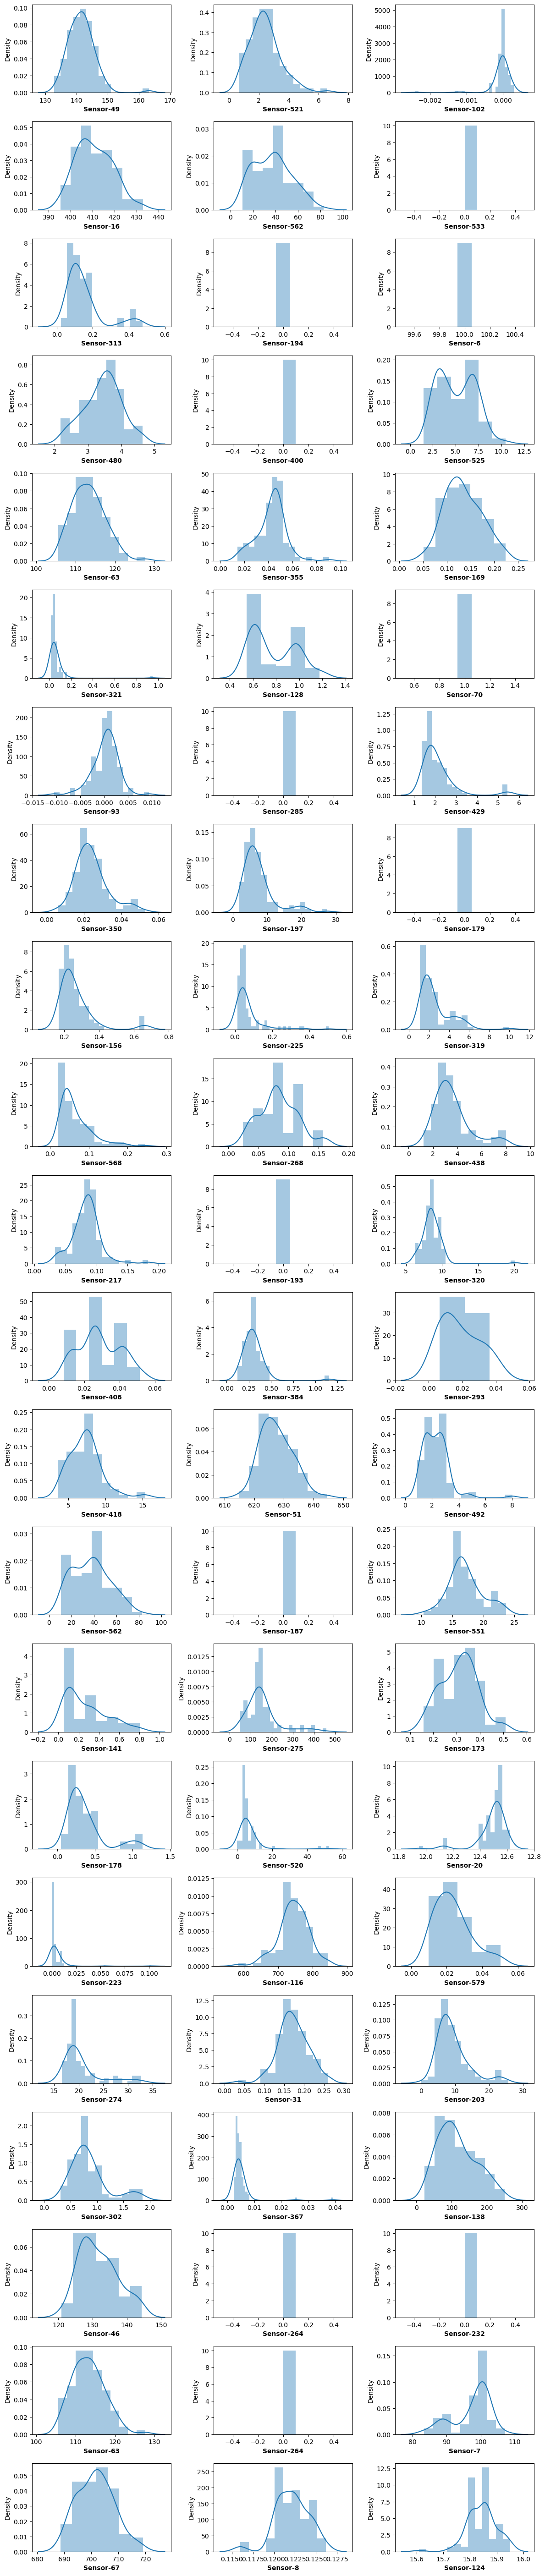

In [134]:
plt.figure(figsize= (12,130))
for i, col in enumerate(list(df.columns[random_50_sensors_idx])):
    plt.subplot(51, 3, i+1)
    sns.distplot(df[col], hist = True, kde = True)
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

# Insight:

# Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we have to  depend upon the scaling. 

# For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

# 4. Get columns to drop

In [7]:
numerical_cols = []
for col in df.columns[:-1]:
    if df[col].dtypes != "O": 
        numerical_cols.append(col)
len(numerical_cols)

590

In [9]:
# Drop coloumns with Zero SD
columns_Zero_STD = []
for col in numerical_cols:
    if df[col].std() == 0:
        columns_Zero_STD.append(col)
len(columns_Zero_STD)

122

In [11]:
# Drop coloumns having null value more the .4
missing_thresh= .5
columns_with_null_values = []
for col in numerical_cols:
    if (df[col].isnull().sum())/(df.shape[0]) > missing_thresh:
        columns_with_null_values.append(col)
len(columns_with_null_values)

16

In [13]:
cols_to_drop = columns_Zero_STD + columns_with_null_values
len(cols_to_drop)

138

# Dropping Columns

In [15]:
for col in cols_to_drop:
    df.drop(columns = [col], axis = 1, inplace = True)

# 6. Remvoing column "Unnamed: 0" as its not required

In [17]:
df.drop(["Unnamed: 0"], axis =1 , inplace = True)

# 5. Split x and Y

In [47]:
x = df.drop(["Good/Bad"], axis =1 )
y = df['Good/Bad']

In [95]:
x.shape, y.shape

((100, 452), (100,))

In [55]:
x.isna().sum().sum()

1169

In [53]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights='uniform')
imputed_data = imputer.fit_transform(x)
imputed_df = pd.DataFrame(imputed_data, columns=x.columns)
print(imputed_df)

    Sensor-1  Sensor-2   Sensor-3    Sensor-4  Sensor-5   Sensor-7  Sensor-8  \
0   2968.330   2476.58  2216.7333  1748.08850   1.11270   97.58220   0.12420   
1   2961.040   2506.43  2170.0666  1364.51570   1.54470   96.77000   0.12300   
2   3072.030   2500.68  2205.7445  1363.10480   1.05180  101.86440   0.12200   
3   3021.830   2419.83  2205.7445  1363.10480   1.05180  101.86440   0.12200   
4   3006.950   2435.34  2189.8111  1084.65020   1.19930  104.88560   0.12340   
5   3003.720   2537.66  2210.7778  2008.92160   1.13510   91.10780   0.12400   
6   2953.590   2504.86  2224.6778  1308.64790   1.39070  101.13330   0.12080   
7   3086.520   2360.04  2204.2333  2110.82880   1.63920   89.03560   0.12450   
8   3048.760   2545.68  2224.6778  1308.64790   1.39070  101.13330   0.12080   
9   2984.060   2619.60  2225.0222  1730.84800   1.53330   98.59780   0.12320   
10  2947.870   2460.05  2204.2333  2110.82880   1.63920   89.03560   0.12450   
11  3008.280   2504.21  2202.2556  1914.

In [59]:
imputed_df.isna().sum().sum()

0

# 6. Data Transformation

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer # HAndling Missing values
from sklearn.preprocessing import RobustScaler # Beacause outliers is no treated. It uses median 
from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer # No category column
# from sklearn.preprocessing import StandardScaler # # Beacause outliers is no treated. It uses mean

In [235]:
num_pipeline = Pipeline(steps = [
                                 ('KNNImputer', KNNImputer())
])
num_pipeline

Pipeline(steps=[('KNNImputer', KNNImputer())])

In [239]:
numerical_cols = []
for col in x.columns:
    if x[col].dtypes != "O": 
        numerical_cols.append(col)
len(numerical_cols)

452

In [241]:
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols)])
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('KNNImputer', KNNImputer())]),
                                 ['Sensor-1', 'Sensor-2', 'Sensor-3',
                                  'Sensor-4', 'Sensor-5', 'Sensor-7',
                                  'Sensor-8', 'Sensor-9', 'Sensor-10',
                                  'Sensor-11', 'Sensor-12', 'Sensor-13',
                                  'Sensor-15', 'Sensor-16', 'Sensor-17',
                                  'Sensor-18', 'Sensor-19', 'Sensor-20',
                                  'Sensor-21', 'Sensor-22', 'Sensor-23',
                                  'Sensor-24', 'Sensor-25', 'Sensor-26',
                                  'Sensor-27', 'Sensor-28', 'Sensor-29',
                                  'Sensor-30', 'Sensor-31', 'Sensor-32', ...])])

In [243]:
x_trans = pd.DataFrame(preprocessor.fit_transform(x), columns = preprocessor.get_feature_names_out())
x_trans.shape

(100, 452)

# 6. Check for class Imbalance
# We can see class is imbalanced as per below cell. So we will apply SMOTE technique to make sure class is Balanced

In [245]:
y

0    -1
1     1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14   -1
15   -1
16   -1
17   -1
18   -1
19   -1
20   -1
21   -1
22   -1
23   -1
24   -1
25   -1
26   -1
27   -1
28   -1
29   -1
30   -1
31   -1
32   -1
33   -1
34   -1
35   -1
36   -1
37   -1
38   -1
39   -1
40   -1
41    1
42   -1
43   -1
44   -1
45   -1
46   -1
47   -1
48   -1
49   -1
50   -1
51   -1
52   -1
53   -1
54   -1
55   -1
56   -1
57   -1
58   -1
59   -1
60   -1
61   -1
62   -1
63   -1
64   -1
65   -1
66   -1
67   -1
68   -1
69   -1
70   -1
71   -1
72   -1
73   -1
74   -1
75   -1
76   -1
77   -1
78   -1
79   -1
80   -1
81   -1
82   -1
83   -1
84    1
85   -1
86   -1
87   -1
88   -1
89   -1
90   -1
91   -1
92   -1
93   -1
94    1
95   -1
96    1
97   -1
98   -1
99    1
Name: Good/Bad, dtype: int64

In [83]:
y.value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

In [247]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state = 1)
x_resampled,y_resampled = smote_tomek.fit_resample(x_trans,y)

In [249]:
x_resampled.shape, y_resampled.shape

((186, 452), (186,))

# 7 Train Test and split

In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_trans,y, test_size = 0.30, random_state = 1)
print(f"X_train shape: {X_train.shape} \nX_test shape: {X_test.shape}, \ny_train{y_train.shape},\ny_test {y_test.shape}")

X_train shape: (70, 452) 
X_test shape: (30, 452), 
y_train(70,),
y_test (30,)


#8 Scaling

In [266]:
from sklearn.preprocessing import RobustScaler
RobustScalers = RobustScaler()

In [270]:
RobustScalers.fit_transform(X_train)
RobustScalers.transform(X_test)

array([[-2.24253772e-01, -9.75725281e-02,  1.42409326e-03, ...,
         1.16402116e-01,  0.00000000e+00, -3.60402917e-01],
       [-3.23273488e-01, -2.42155121e-01,  5.91588869e-01, ...,
        -1.48148148e-01, -9.52380952e-02,  3.60500767e-01],
       [-9.58255314e-02, -2.36589698e-01,  5.64980135e-01, ...,
         6.03174603e-01,  6.03174603e-01,  1.02019264e+00],
       ...,
       [-1.28835775e+00, -2.80592066e+00, -5.65446280e-02, ...,
         2.01058201e-01,  5.71428571e-01, -1.58529011e-01],
       [-9.35235158e-01,  2.83718176e-01, -4.96080536e-01, ...,
         1.34391534e+00,  1.61904762e+00,  2.24155863e+00],
       [ 4.09075889e-01,  3.64831261e-01, -3.82991280e-01, ...,
         1.53439153e+00,  1.55555556e+00, -8.44349777e-02]])

In [276]:
X_train.shape

(70, 452)

# 8. Model Training

In [278]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [280]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC( kernel='rbf'),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          #"XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

In [282]:
kf = KFold(n_splits = 3, shuffle=True, random_state=None)  

In [284]:
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, X_train, y_train, cv = kf)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_score = accuracy_score(y_test,y_pred)
    print(f"Accuracy score of {model} is {model_score * 100}") 
    print("*"*35)
    report.append(model_score*100)
    model_list.append(list(models.keys())[i])
 
print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max(sorted(report)))]}")

Scores [91.66666667 91.30434783 86.95652174]
Mean Score 0.8997584541062801
Accuracy score of LogisticRegressionCV() is 90.0
***********************************
Scores [ 91.66666667 100.          91.30434783]
Mean Score 0.9432367149758454
Accuracy score of SVC() is 93.33333333333333
***********************************
Scores [91.66666667 95.65217391 86.95652174]
Mean Score 0.9142512077294686
Accuracy score of LinearSVC() is 90.0
***********************************
Scores [95.83333333 95.65217391 91.30434783]
Mean Score 0.9426328502415459
Accuracy score of RandomForestClassifier() is 93.33333333333333
***********************************
Scores [ 95.83333333 100.          91.30434783]
Mean Score 0.9571256038647343
Accuracy score of AdaBoostClassifier() is 90.0
***********************************
Scores [ 87.5        100.          95.65217391]
Mean Score 0.9438405797101449
Accuracy score of GradientBoostingClassifier() is 90.0
***********************************
Scores [ 95.83333333 100.  

# shortlisted base models

In [134]:
models_short = { "LR" : LogisticRegressionCV(),
                  "SVC_rbf" : SVC( kernel='rbf'),
                  "SVC_clf" : SVC( kernel='linear'),
                  "LSVC" : LinearSVC(),
                  "RFC" : RandomForestClassifier(),
                  "GNB" : GaussianNB()
         }

In [298]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [286]:
len(models_short)

6

In [225]:
model_list = []
report = []
for i in range(len(models_short)):
    model = (list(models_short.values())[i])
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_score = (accuracy_score(y_test,y_pred))
    model_score = round(model_score,4)
    print(f"Accuracy score of {model} is {model_score * 100}") 
    print("*"*35)
    report.append(model_score*100)
    model_list.append(list(models_short.values())[i])

print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max(report))]}")

Scores [100.          92.85714286  92.85714286  92.85714286  92.85714286]
Mean Score 0.9428571428571428
Accuracy score of LogisticRegressionCV() is 93.33
***********************************
Scores [100.          92.85714286  92.85714286  92.85714286  92.85714286]
Mean Score 0.9428571428571428
Accuracy score of SVC() is 93.33
***********************************
Scores [100.          92.85714286  92.85714286  92.85714286  92.85714286]
Mean Score 0.9428571428571428
Accuracy score of SVC(kernel='linear') is 93.33
***********************************
Scores [100.          85.71428571  78.57142857 100.          92.85714286]
Mean Score 0.9142857142857143
Accuracy score of LinearSVC() is 93.33
***********************************
Scores [100.          92.85714286  92.85714286  92.85714286  92.85714286]
Mean Score 0.9428571428571428
Accuracy score of RandomForestClassifier() is 93.33
***********************************
Scores [100.          92.85714286  92.85714286  92.85714286  92.85714286]
Mean

In [227]:
model_list

[LogisticRegressionCV(),
 SVC(),
 SVC(kernel='linear'),
 LinearSVC(),
 RandomForestClassifier(),
 GaussianNB()]

In [175]:
model_list[report.index(max(report))]

LogisticRegressionCV()

In [143]:
{model_list[report.index(max((report)))[1]]}

TypeError: 'int' object is not subscriptable

In [764]:
model_list

['LR', 'SVC_rbf', 'SVC_clf', 'LSVC', 'RFC', 'GNB']

# Using PCA

In [797]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ("SVC_clf" ,SVC( kernel='linear'))
])

In [799]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('SVC_clf', SVC(kernel='linear'))])

In [801]:
y_pred = pipeline.predict(X_test)

In [805]:
accuracy_score(y_pred,y_test)

0.9333333333333333

# One more method using PCA

In [923]:
x_trans.shape, y.shape

((100, 452), (100,))

In [973]:
df_copy = x_trans

In [975]:
df_copy.shape

(100, 452)

In [977]:

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Reduce to 2 components
df_pca = pca.fit_transform(df_copy)
df_pca.shape

(100, 6)

In [979]:

# Step 3: Check explained variance ratio
print("Explained explained variance: ", pca.explained_variance_ratio_)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance: ", cumulative_variance)

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to retain 95% variance: ", n_components)

Explained explained variance:  [0.65929148 0.21765127 0.02853016 0.02306072 0.01426755 0.00923201]
Cumulative explained variance:  [0.65929148 0.87694275 0.90547291 0.92853363 0.94280118 0.9520332 ]
Number of components to retain 95% variance:  6


In [981]:
# Step 4: View transformed data
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2',"PC3","PC4","PC5", "PC6"])
print(df_pca.head())
print(df_pca.shape)

        PC1        PC2       PC3        PC4       PC5       PC6
0 -9.759157  -8.938364 -1.249852  -8.496476 -5.312555 -2.312747
1 -9.779027 -10.052219  0.619469  -7.584828 -1.708933 -2.587035
2 -9.865762  -9.019525 -1.419228  -9.689175 -5.363983 -3.221909
3 -9.740367  -8.721572 -0.398024  -9.858619  3.447405 -1.279969
4 -9.847909  -9.079358  0.463463 -10.394026  5.760059 -4.058772
(100, 6)


In [985]:
df_pca.shape, y.shape

((100, 6), (100,))

In [987]:
x_pca = df_pca

In [991]:
x_pca.shape

(100, 6)

In [993]:
X_train,X_test,y_train,y_test = train_test_split(x_pca,y, test_size = 0.20, random_state = 1)
print(f"X_train shape: {X_train.shape} \nX_test shape: {X_test.shape}, \ny_train{y_train.shape},\ny_test {y_test.shape}")

X_train shape: (80, 6) 
X_test shape: (20, 6), 
y_train(80,),
y_test (20,)


In [995]:
model_list = []
report = []
for i in range(len(models_short)):
    model = (list(models_short.values())[i])
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_score = accuracy_score(y_test,y_pred)
    print(f"Accuracy score of {model} is {model_score * 100}") 
    print("*"*35)
    report.append(model_score*100)
    model_list.append(list(models_short.keys())[i])
 
print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max((report)))]}")

Scores [93.75 93.75 93.75 93.75 93.75]
Mean Score 0.9375
Accuracy score of LogisticRegressionCV() is 95.0
***********************************
Scores [93.75 93.75 93.75 93.75 93.75]
Mean Score 0.9375
Accuracy score of SVC() is 95.0
***********************************
Scores [87.5  93.75 93.75 93.75 93.75]
Mean Score 0.925
Accuracy score of SVC(kernel='linear') is 95.0
***********************************
Scores [87.5  93.75 93.75 93.75 93.75]
Mean Score 0.925
Accuracy score of LinearSVC() is 90.0
***********************************
Scores [93.75 93.75 93.75 93.75 93.75]
Mean Score 0.9375
Accuracy score of RandomForestClassifier() is 95.0
***********************************
Scores [37.5  62.5  25.   12.5  31.25]
Mean Score 0.3375
Accuracy score of GaussianNB() is 30.0
***********************************
Model with highest accuracy is -> 95.0. Model name is LR


# HyperTuning

In [183]:
models_short = { "LR" : LogisticRegressionCV(),
                  "SVC_rbf" : SVC( kernel='rbf'),
                  "SVC_clf" : SVC( kernel='linear'),
                  "LSVC" : LinearSVC(),
                  "RFC" : RandomForestClassifier(),
                  "GNB" : GaussianNB()
         }

In [185]:
from sklearn.model_selection import GridSearchCV

In [201]:
LR = LogisticRegressionCV()
LR.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [207]:
params = { "Cs" : [10,20,30,1,5,8], "penalty" : ['l1', 'l2', 'elasticnet'] }

In [209]:
GridSearchCV1 = GridSearchCV(LR, param_grid = params, cv = 5, verbose= True )

In [211]:
GridSearchCV1.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=LogisticRegressionCV(),
             param_grid={'Cs': [10, 20, 30, 1, 5, 8],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=True)

In [213]:
GridSearchCV1.best_score_

0.9428571428571428

In [229]:
a  = GridSearchCV1.best_params_

In [231]:
finetuned_model = LogisticRegressionCV.set_params(a)

In [233]:
finetuned_model

{'Cs': 10, 'penalty': 'l2'}

In [1097]:
model = GridSearchCV1.best_estimator_

In [1056]:
y_pred = model.predict(X_test)

In [1099]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [107]:
import pandas as pd

# 2D DataFrame
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
df

,0,1,2
0,1,2,3
1,4,5,6


In [109]:
df# Convert to 1D
array_1d = df.values.flatten()
print(array_1d)

[1 2 3 4 5 6]


In [ ]:
model_selection:
    model:
      XGBClassifier:
        search_param_grid:
          learning_rate: 
           - 0.1
           - 0.01
           - 0.001
           
          max_depth: 
           - 3
           - 5
           - 7
          
          n_estimators: 
           - 100
           - 200
           - 300
          
          gamma: 
           - 0
           - 0.1
           - 0.2
          
          
      GradientBoostingClassifier:
        search_param_grid:
          n_estimators:
           - 100
          criterion:
           - friedman_mse

      SVC:
        search_param_grid:
          C: 
           - 0.1
           - 1
           - 10
          kernel: 
           - linear
           - rbf
          gamma: 
           - 0.1
           - 0.01
           - 0.001

      RandomForestClassifier:
        search_param_grid:
          n_estimators: 
           - 100
           - 200
           - 300
          max_depth: 
           - None
           - 5
           - 10
          min_samples_split: 
           - 2
           - 5
           - 10
          min_samples_leaf: 
           - 1
           - 2
           - 4